# CSDS 340 Case Study 2
*Report by Prateek Dullur and Robbie Hammond*

# Introduction
This case study involved tracking the movements of various ships through a region of the sea. Given that the labels are unknown, this is a mostly unsupervised problem. However, there are aspects that could be considered a supervised problem due to the time series nature of the data. We started by exploring ways to predict the time course of the ships by using a neural 

Here is a map of dataset 3 -- the one being tested on

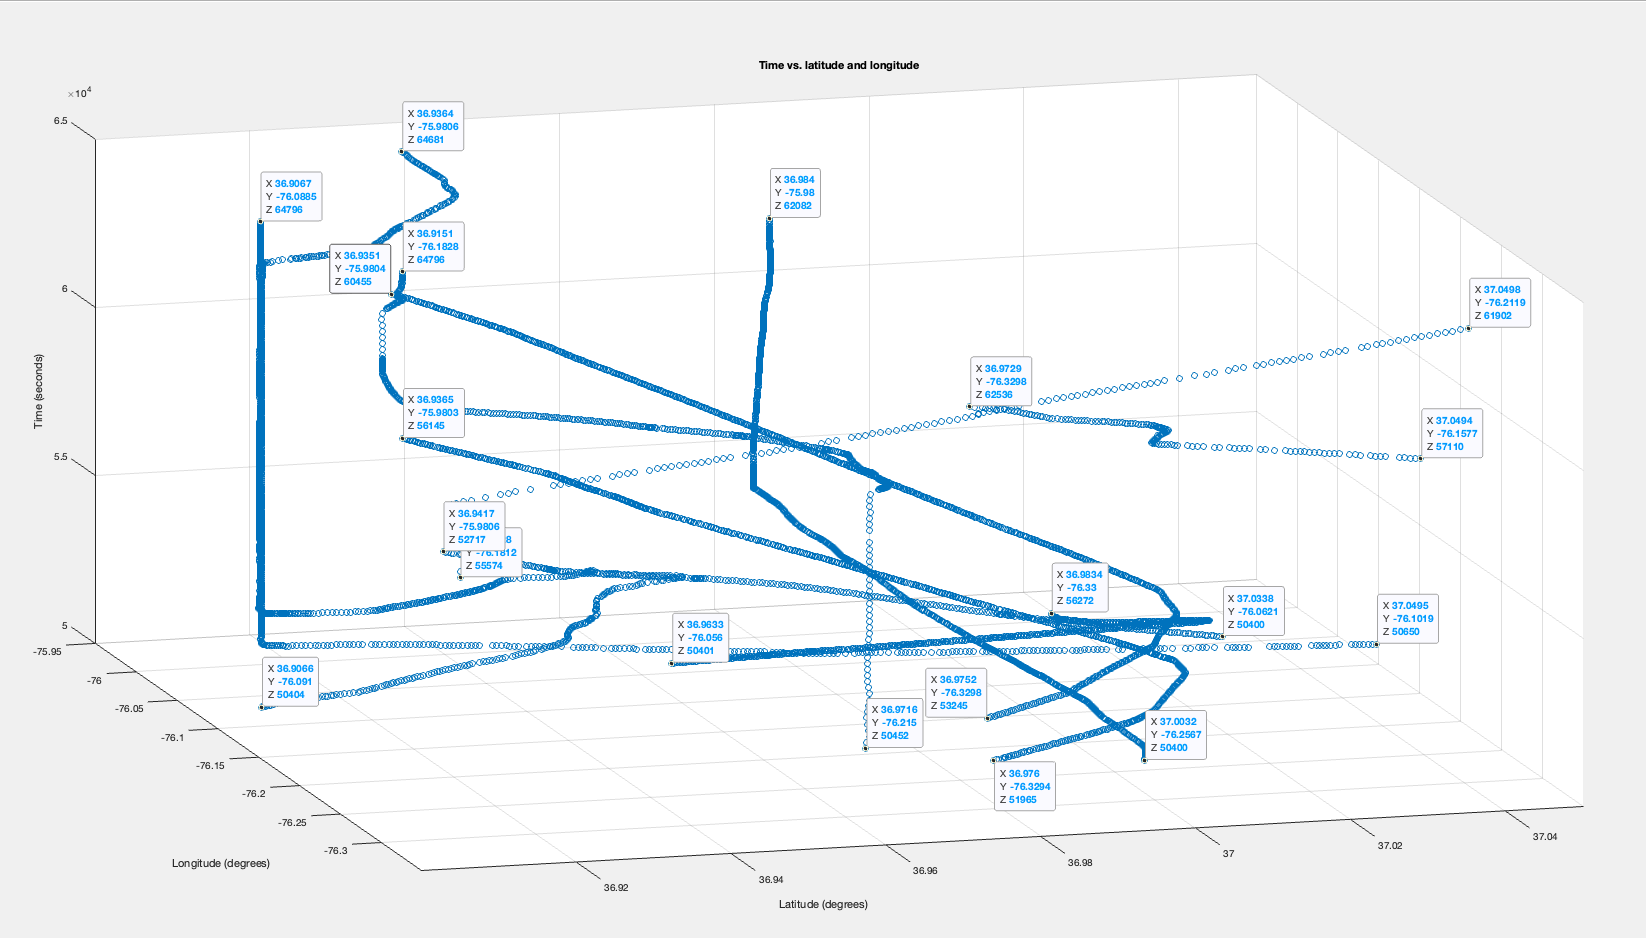

Here is a map of dataset 2, which was used for analysis and basline testing of the different models:
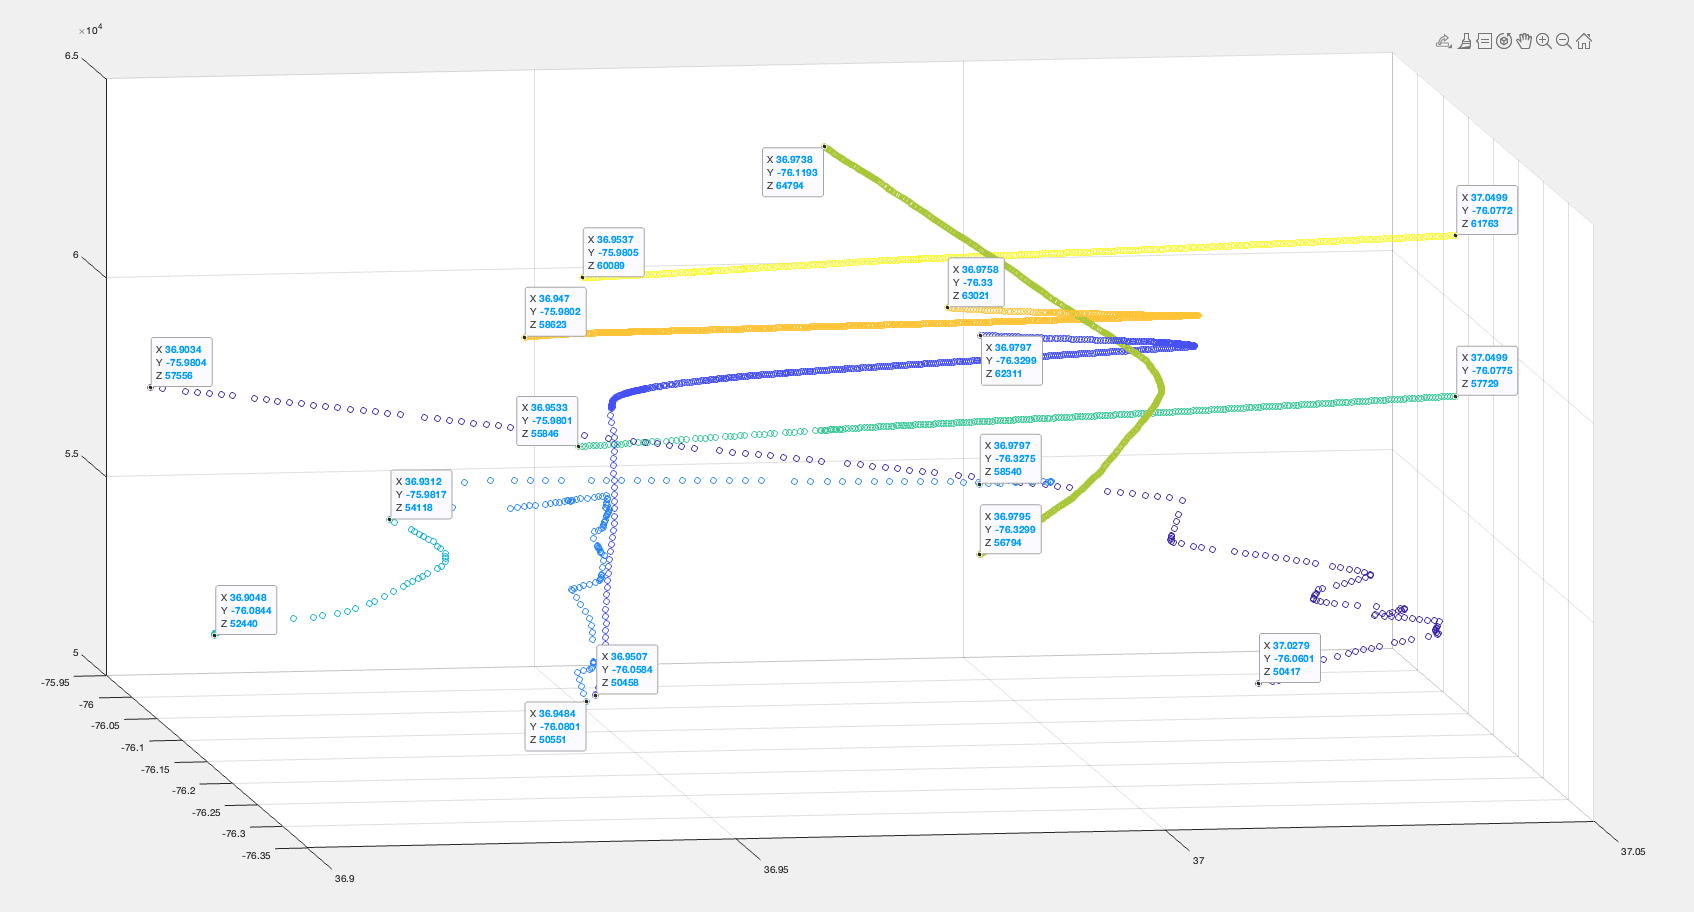

# Data Preprocessing

### Dealing with Course Over Ground

Course over ground is expressed in degrees, which presents a problem when attempting to train a model on the data. The measurement of degrees (or radians) is modular, meaning that the magnitude of the measurement "wraps around" itself after a certain point (360 when measuring with degrees and $2\pi$ when measuring with radians). This results in 359 degrees being very close to 1 degree, while 180 degrees is far from 0 degrees. Since the modular nature of the course over ground feature is not directly embedded into the data, we must make it such that the model is easily able to understand which measurements are close and which ones are far apart. The easiest way to do this is to translate the angular measurement into a point on the unit circle using trigonometry. This way, the distance between two course over ground measurements becomes mathematically simple and does not require additional context. For the example above, both 359 degrees and 1 degree will map to a point close to (1, 0), making the distance between them extremely small. On the other hand, 180 degrees will map to (-1, 0) and 0 degrees will map to (1, 0), which are very far apart in the context of the unit circle. 

Insert other data pre-processing/feature engineering here.


# Algorithm Selection

Talk about algos tried and whatnot here. 

# Deployment Recommendations

If deployed in the real world, evaluating a model would have to be done with care. This is because there exist several real-world considerations that one would have to keep in mind when assessing a model that do not need to be studied with the datasets used in this case study, such as the following:
- Ships following complicated trajectories where the course over ground and speed over ground change more frequently than can be captured by the AIS data. To put it more succinctly, aliasing due to undersampling can present a problem in the context of AIS data. This phenomenon may occur in the case of extreme weather conditions, for example. This is hardly a consideration in this case study, as the ships in the datasets follow relatively easy-to-predict patterns, often consisting of straight lines and smooth curves.
- The number of ships in a given area potentially being large, where the ships may be close together at the same time. Without knowing the VIDs, it would be extremely easy for a model (and a human, for that matter) to get the paths of ships mixed up. In this case study, ships were essentially never close together at the same point in time, and the total number of ships active at the same time was never large. 
- The existence of blackout periods. In the real world, blackouts can happen, where AIS data cannot be collected for any ship for some duration of time. Once AIS data can be generated and analyzed again, it would be very difficult to match the new paths to ships, especially if the blackout period was lengthy. In this dataset, no blackout periods exist and ships are constantly generating AIS data.

Though the aforementioned problems are theoretically solvable (enforce ships to take more AIS samples to prevent aliasing, increase the resolution of the positional data to easily distinguish close ships, use backup systems in the case of blackouts, etc), they almost certainly are impractical to implement or cannot be changed by a regular machine learning engineer. For this reason, training a model that is capable of handling these problems is the most reasonable solution. As such, evaluating a real-world model should not be done by just assessing the adjusted Rand index in normal conditions, as done in this case study. The adjusted Rand index should be a suitable metric to use, but the ARI should not be considered in isolation. Depending on how critical it is for the model to function in unexpected circumstances, it may be more beneficial to consider the model's ARI on more chaotic datasets (datasets where there is extreme weather, a large number of ships, blackouts, etc) more than its ARI in regular environments.
